In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report

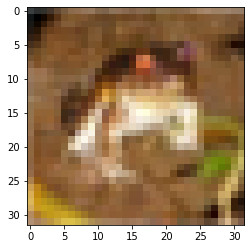

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
plt.imshow(x_train[0])

In [3]:
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y=y_train, num_classes=10)
y_test = to_categorical(y=y_test, num_classes=10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=1)

model.fit(x=x_train, y=y_train, epochs=15, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4130 - accuracy: 0.4995 - val_loss: 1.2213 - val_accuracy: 0.5680
Epoch 2/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1213 - accuracy: 0.6077 - val_loss: 1.1252 - val_accuracy: 0.6034
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9771 - accuracy: 0.6579 - val_loss: 1.0682 - val_accuracy: 0.6282
Epoch 4/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8651 - accuracy: 0.6976 - val_loss: 1.0229 - val_accuracy: 0.6403
Epoch 5/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7612 - accuracy: 0.7327 - val_loss: 1.0589 - val_accuracy: 0.6460


In [5]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.412977,0.49952,1.221253,0.5680
1,1.121289,0.60768,1.125249,0.6034
2,0.977128,0.65792,1.068235,0.6282
3,0.865073,0.69760,1.022932,0.6403
4,0.761191,0.73266,1.058928,0.6460


In [6]:
predictions = np.argmax(model.predict(x_test), axis=1)
predictions = to_categorical(predictions)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1000
           1       0.87      0.64      0.74      1000
           2       0.62      0.42      0.50      1000
           3       0.48      0.41      0.44      1000
           4       0.54      0.64      0.59      1000
           5       0.57      0.51      0.54      1000
           6       0.59      0.85      0.70      1000
           7       0.76      0.70      0.73      1000
           8       0.80      0.74      0.77      1000
           9       0.63      0.85      0.72      1000

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000
 samples avg       0.65      0.65      0.65     10000



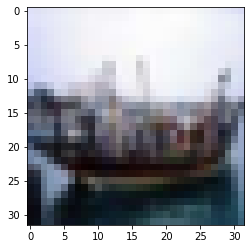

In [10]:
test = x_test[18]
plt.imshow(test.reshape(32, 32, 3))

In [11]:
np.argmax(model.predict(test.reshape(1,32,32,3)), axis=1)

array([8], dtype=int64)

In [12]:
np.argmax(y_test[17])

7